# Combined performance plot

Plots the performance of ChoiceRank vs baselines on the three real-world datasets (Wikipedia, Kosarak, Citi Bike).

In [1]:
%matplotlib inline

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pickle
import thesis

from thesis.choicerank import qtod, weighted_quantiles
from matplotlib.patches import Polygon

In [3]:
thesis.setup_plotting()

Thesis settings loaded!


In [4]:
BP = dict(linewidth=0.5, color="black")
WP = dict(linewidth=0.5, linestyle="--", color="black")
FP = dict(markersize=3)
CP = dict(linewidth=0.5)

def make_boxplot(ax, data, weights=None, **kwargs):
    if weights is not None:
        means = tuple(np.average(d, weights=weights) for d in data)
        fracs = [0.05, 0.25, 0.5, 0.75, 0.95]
        data = tuple(qtod(zip(fracs, weighted_quantiles(d, weights, fracs))) for d in data)
    else:
        means = tuple(d.mean() for d in data)
    bp = ax.boxplot(data, **kwargs, whis=[5,95], widths=0.5,
            boxprops=BP, whiskerprops=WP, flierprops=FP, capprops=CP)
    idx = list(range(1, len(data) + 1))
    ax.plot(idx , means, "rs")
    # Highlight ChoiceRank.
    box = bp["boxes"][0]
    coords = list(zip(*box.get_data()))
    polygon = Polygon(coords, facecolor="#E5E5E5", linewidth=0)
    ax.add_patch(polygon)
    # Remove ticks at the top.
    ax.xaxis.set_ticks_position("bottom")
    if "labels" in kwargs:
        ax.set_xticklabels(kwargs["labels"])#, rotation=30)

## Load the data

In [5]:
with open("data/wpclk-201603.pickle", "rb") as f:
    wp = pickle.load(f)

with open("data/citibike-2015.pickle", "rb") as f:
    cb = pickle.load(f)

with open("data/kosarak.pickle", "rb") as f:
    kr = pickle.load(f)

## Plot it

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


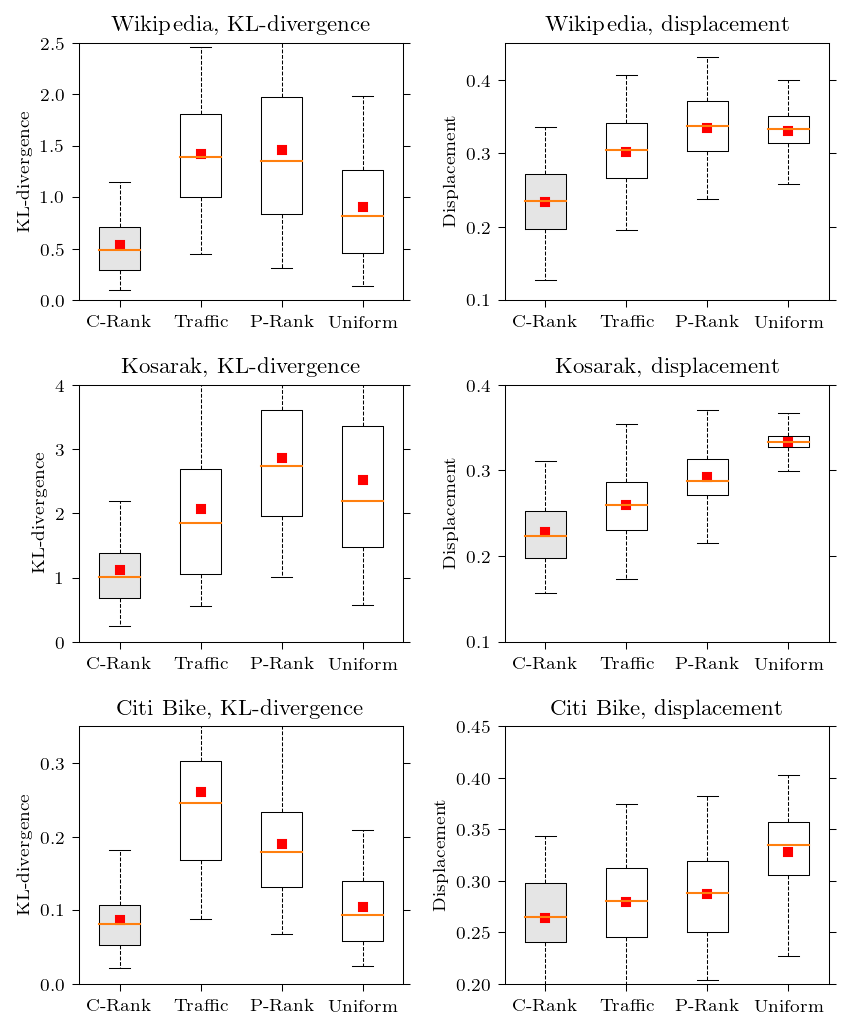

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(5.78, 7.0))

methods = ("crnk", "traf", "prnk", "unif")
labels = ("C-Rank", "Traffic", "P-Rank", "Uniform")

### Wikipedia
# KL-divergence.
kls = tuple(wp["kls"][m] for m in methods)
make_boxplot(axs[0,0], kls, weights=wp["ws"], labels=labels)
axs[0,0].set_title("Wikipedia, KL-divergence")
axs[0,0].set_ylabel("KL-divergence")
axs[0,0].set_ylim(ymin=0, ymax=2.5)
# Displacement.
dps = tuple(wp["dps"][m] for m in methods)
make_boxplot(axs[0,1], dps, weights=wp["ws"], labels=labels)
axs[0,1].set_title("Wikipedia, displacement")
axs[0,1].set_ylabel("Displacement")
axs[0,1].set_ylim(ymin=0.1, ymax=0.45)

### Kosarak
# KL-divergence.
kls = tuple(kr["kls"][m] for m in methods)
make_boxplot(axs[1,0], kls, weights=kr["ws"], labels=labels)
axs[1,0].set_title("Kosarak, KL-divergence")
axs[1,0].set_ylabel("KL-divergence")
axs[1,0].set_ylim(ymin=0, ymax=4.0)
# Displacement.
dps = tuple(kr["dps"][m] for m in methods)
make_boxplot(axs[1,1], dps, weights=kr["ws"], labels=labels)
axs[1,1].set_title("Kosarak, displacement")
axs[1,1].set_ylabel("Displacement")
axs[1,1].set_ylim(ymin=0.10, ymax=0.40)

### Citi Bike
# KL-divergence.
kls = tuple(cb["kls"][m] for m in methods)
make_boxplot(axs[2,0], kls, weights=cb["ws"], labels=labels)
axs[2,0].set_title("Citi Bike, KL-divergence")
axs[2,0].set_ylabel("KL-divergence")
axs[2,0].set_ylim(ymin=0, ymax=0.35)
# Displacement.
dps = tuple(cb["dps"][m] for m in methods)
make_boxplot(axs[2,1], dps, weights=cb["ws"], labels=labels)
axs[2,1].set_title("Citi Bike, displacement")
axs[2,1].set_ylabel("Displacement")
axs[2,1].set_ylim(ymin=0.20, ymax=0.45)

fig.savefig("perf-combined.pdf")